# Menjalankan Tensorboard
Untuk menjalankan tensorboard, anda dapat mengetikkan perintah di bawah ini melalui terminal:

terminal

```tensorboard --logdir=runs```

Anda dapat mengganti runs dengan path tensorboard anda apabila anda merasa bahwa tensorboard anda tidak diinstal pada direktori default. Sesudah perintah diatas diketikkan maka akan terdapat url localhost dan port yang dapat digunakan untuk menjalankan tensorboard. Anda dapat mengklik url tersebut sehingga tensorboard terbuka di browser anda. Pada tahap ini, tensorboard memang tidak akan berjalan karena kita belum menjalankan apapun pada program.

Anda dapat mengabaikan keterangan TensorFlow installation not found - running with reduced feature set. karena memang kita tidak sedang menggunakan tensorflow.

In [31]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Mengimpor Tensorboard

- tensorboard diimpor dengan menggunakan from torch.utils.tensorboard import SummaryWriter
- Selanjutnya kita akan menggunakan SummaryWriter untuk menulis data ke tensorboard
- Kita membuat sebuah variabel bernama writer dan kita masukan SumaryWriter ke dalamnya beserta informasi terkait path dimana data tensorboard akan disimpan.
- Kita juga membutuhkan import sys

In [32]:
import sys
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('./38_runs/mnist4')

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
input_size      = 784
hidden_size     = 500
num_classes     = 10
num_epochs      = 2
batch_size      = 100
learning_rate   = 0.01

In [35]:
train_dataset = torchvision.datasets.MNIST(root='./38_runs',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./38_runs',
                                           train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

Ukuran sample: torch.Size([100, 1, 28, 28])
Ukuran label: torch.Size([100])


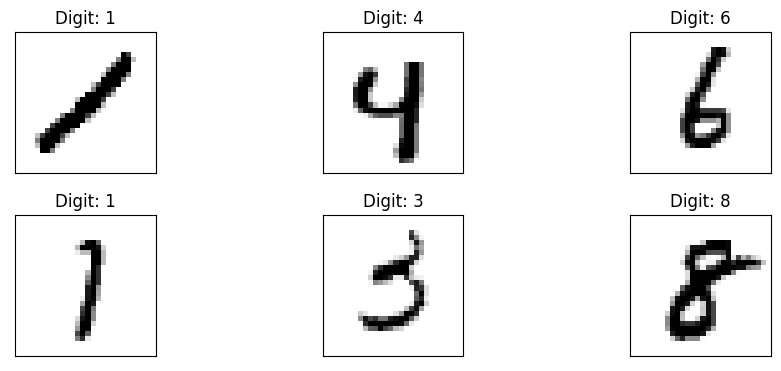

In [36]:
example_batch   = iter(train_loader)
samples, labels = next(example_batch)
print(f'Ukuran sample: {samples.shape}')
print(f'Ukuran label: {labels.shape}')

# show 6 samples image with label using subplot
fig = plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(samples[i][0], cmap='gist_yarg')
    plt.title("Digit: {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

# Membuat image grid untuk tensorboard

- Kita membuat sebuah variabel sample_grid untuk menampung data gambar yang akan ditampilkan pada tensorboard.
- writer.add_image adalah sebuah method yang digunakan untuk mengirimkan data gambar ke tensorboard.
- writer.close() adalah sebuah method yang digunakan untuk menutup koneksi ke tensorboard.

In [37]:
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('Image_Grid_MNIST', img_grid)
writer.close()

# Menjalankan Tensorboard

- Untuk menjalankan tensorboard, buka terminal dan pindah ke direktori dari repositori ini (pengantarDLpytorch)
- Setelah program ini dijalankan, akan terbentuk folder baru bernama 'runs' (sesuai dengan path pada writer)
- Jalankan tensorboard dengan mengetikkan tensorboard --logdir=38_runs (apabila path anda berbeda, silahkan disesuaikan)

In [38]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1    = nn.Linear(input_size, hidden_size)
        self.relu   = nn.ReLU()
        self.fc2    = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Membuat model graph untuk tensorboard

- Perintah yang digunakan adalah writer.add_graph
- writer.add_graph adalah sebuah method yang digunakan untuk mengirimkan grafik model ke tensorboard.
- Data sampel yang kita berikan ke writer haruslah direshape terlebih dahulu

In [40]:
writer.add_graph(model, samples.reshape(-1,28*28))
writer.close()

Setelah menjalankan bagian diatas, dapat kita amati bahwa terdapat tab baru pada tensorboard yang berjudul 'Graph'. (silahkan refresh halaman untuk melihat perubahan). Anda dapat membuka tab tersebut dan melakukan dobel-klik pada tulisan neural_net untuk melihat grafik model.

In [41]:
n_total_step = len(train_loader)

running_loss = 0.0
running_correct = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_step}], Loss: {loss.item():.4f}')
            writer.add_scalar('Training Loss', running_loss / 100, epoch * n_total_step + i)
            writer.add_scalar('Accuracy', running_correct / 100, epoch * n_total_step + i)
            running_loss = 0.0
            running_correct = 0

Epoch [1/2], Step [100/600], Loss: 0.3558
Epoch [1/2], Step [200/600], Loss: 0.0721
Epoch [1/2], Step [300/600], Loss: 0.1364
Epoch [1/2], Step [400/600], Loss: 0.3011
Epoch [1/2], Step [500/600], Loss: 0.0775
Epoch [1/2], Step [600/600], Loss: 0.1669
Epoch [2/2], Step [100/600], Loss: 0.1007
Epoch [2/2], Step [200/600], Loss: 0.0453
Epoch [2/2], Step [300/600], Loss: 0.0197
Epoch [2/2], Step [400/600], Loss: 0.1044
Epoch [2/2], Step [500/600], Loss: 0.0625
Epoch [2/2], Step [600/600], Loss: 0.0589


### Running Loss & Running Correct Pada bagian training loop ditambahkan beberapa hal seperti:

- running_loss += loss.item() untuk menghitung loss per step
- running_correct += (predicted == labels).sum().item() untuk menghitung jumlah benar per step
- writer.add_scalar('Training Loss', running_loss / 100, epoch * n_total_step + i) untuk mengirimkan loss ke tensorboard
- writer.add_scalar('Accuracy', running_correct / 100, epoch * n_total_step + i) untuk mengirimkan accuracy ke tensorboard
- running_loss = 0.0 untuk mengosongkan running loss
- running_correct = 0 untuk mengosongkan running correct

In [42]:
labels = []
preds = []


with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, ylabels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        ylabels = ylabels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += ylabels.size(0)
        n_correct += (predicted == ylabels).sum().item()

        class_prediction = [F.softmax(outputs, dim=0) for outputs in outputs]
        preds.append(class_prediction)
        labels.append(predicted)

    preds = torch.cat([torch.stack(batch) for batch in preds])
    labels = torch.cat(labels, dim=0)

    accuracy = 100.0 * n_correct / n_samples
    print(f'Akurasi: {accuracy}')

    classes = range(10)
    for i in classes:
        labels_i = labels == i
        preds_i = preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()

Akurasi: 97.01
